# Motion Capture Hand Postures

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql.cursors

In [2]:
# Loading data to dataframe using pandas
df = pd.read_csv('Group_8_data.csv')

In [3]:
# Dropping the dummy rows
df = df.drop(labels=0, axis=0)

In [4]:
# Replacing the '?' with NaN
df.replace('?',np.NaN,inplace=True)

In [5]:
df.iloc[:,2:38] = df.iloc[:,2:38].astype('float')

In [6]:
col = df.columns[2:]
col

Index(['X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3',
       'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6', 'X7', 'Y7', 'Z7',
       'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11',
       'Z11'],
      dtype='object')

In [7]:
# Taking the mean according to 'Class' and replacing with mean value
for i in col:
    df[i] = (df[i].fillna(df.groupby('Class')[i].transform('mean')).astype(float))

In [8]:
df

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952,NaN,NaN,NaN
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-6.543115,87.733364,61.216363,-62.126278,57.027873,85.807738,-32.768163,NaN,NaN,NaN
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-62.130563,78.229847,33.078407,-45.249543,57.027873,85.807738,-32.768163,NaN,NaN,NaN
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,3.835904,78.591554,32.327738,-46.166556,57.027873,85.807738,-32.768163,NaN,NaN,NaN
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-63.221626,50.793322,91.949619,-30.884241,57.027873,85.807738,-32.768163,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78095 entries, 1 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78095 non-null  int64  
 1   User    78095 non-null  int64  
 2   X0      78095 non-null  float64
 3   Y0      78095 non-null  float64
 4   Z0      78095 non-null  float64
 5   X1      78095 non-null  float64
 6   Y1      78095 non-null  float64
 7   Z1      78095 non-null  float64
 8   X2      78095 non-null  float64
 9   Y2      78095 non-null  float64
 10  Z2      78095 non-null  float64
 11  X3      78095 non-null  float64
 12  Y3      78095 non-null  float64
 13  Z3      78095 non-null  float64
 14  X4      78095 non-null  float64
 15  Y4      78095 non-null  float64
 16  Z4      78095 non-null  float64
 17  X5      78095 non-null  float64
 18  Y5      78095 non-null  float64
 19  Z5      78095 non-null  float64
 20  X6      78095 non-null  float64
 21  Y6      78095 non-null  float64
 22

In [10]:
# dropping the NaN columns
to_drop = ['X11', 'Y11', 'Z11']
for i in (to_drop):
    df = df.drop(i, axis=1)

In [11]:
# filling missing values with mean
df.fillna(value=df.mean(), inplace=True)

In [12]:
df

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-53.126136,61.494952,101.205748,-6.543115,87.733364,61.216363,-62.126278,57.027873,85.807738,-32.768163
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-5.985371,88.177233,60.780642,-62.130563,78.229847,33.078407,-45.249543,57.027873,85.807738,-32.768163
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,-62.718735,-1.779495,98.089459,3.835904,78.591554,32.327738,-46.166556,57.027873,85.807738,-32.768163
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,3.394291,88.465709,60.050791,-63.221626,50.793322,91.949619,-30.884241,57.027873,85.807738,-32.768163


{'whiskers': [<matplotlib.lines.Line2D at 0x219d4b79670>,
 'caps': [<matplotlib.lines.Line2D at 0x219d4b79ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x219d4b793a0>,
 'medians': [<matplotlib.lines.Line2D at 0x219d58de1c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x219d58de490>,
 'means': []}

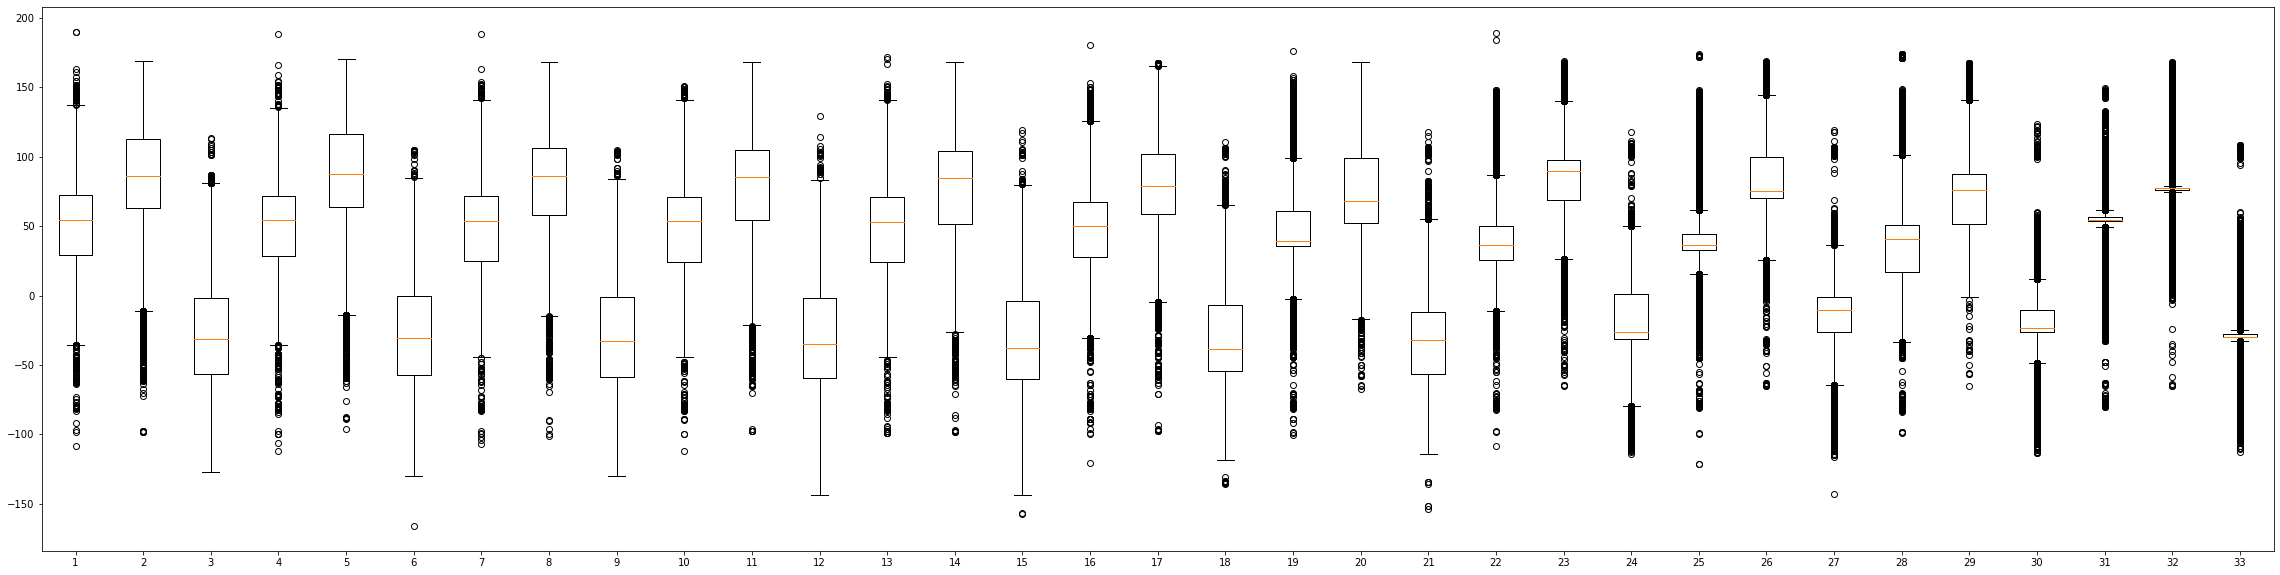

In [13]:
# checking the outliers with boxplot
plt.figure(figsize=(40,10))
plt.boxplot(df.iloc[:,2:])

In [14]:
# Taking the interquantile range
q1 = df.iloc[:,2:].quantile(0.25)
q3 = df.iloc[:,2:].quantile(0.75)
iqr = q3 - q1
iqr

X0     43.193692
Y0     49.610927
Z0     54.937131
X1     43.007402
Y1     52.072431
Z1     56.992328
X2     46.388583
Y2     48.607987
Z2     57.708205
X3     47.033285
Y3     50.646409
Z3     57.474244
X4     46.704050
Y4     52.646464
Z4     56.092913
X5     39.205088
Y5     42.627619
Z5     47.898895
X6     25.532914
Y6     46.589290
Z6     44.652677
X7     24.461618
Y7     28.499912
Z7     32.456342
X8     11.392971
Y8     29.767376
Z8     25.278195
X9     33.711443
Y9     35.618671
Z9     15.220085
X10     2.970847
Y10     0.946076
Z10     1.916662
dtype: float64

In [15]:
# Finding lowerbound and upper bound values with boxplot
lb = q1 - 1.5*(iqr)
ub = q3 + 1.5*(iqr)

In [16]:
lb

X0     -35.495397
Y0     -10.918646
Z0    -138.762290
X1     -35.755424
Y1     -13.952197
Z1    -142.848900
X2     -44.409469
Y2     -14.858248
Z2    -145.216647
X3     -46.366420
Y3     -21.446058
Z3    -145.435121
X4     -45.723595
Y4     -27.316745
Z4    -143.872922
X5     -30.787820
Y5      -4.765563
Z5    -126.250496
X6      -2.689837
Y6     -17.346614
Z6    -123.423058
X7     -11.243865
Y7      26.372342
Z7     -79.784701
X8      15.951786
Y8      25.722207
Z8     -64.272867
X9     -33.485287
Y9      -1.484185
Z9     -48.713932
X10     49.600755
Y10     74.892801
Z10    -32.567608
dtype: float64

In [17]:
ub

X0     137.279372
Y0     187.525064
Z0      80.986235
X1     136.274183
Y1     194.337528
Z1      85.120412
X2     141.144862
Y2     179.573701
Z2      85.616174
X3     141.766721
Y3     181.139577
Z3      84.461854
X4     141.092604
Y4     183.269109
Z4      80.498729
X5     126.032532
Y5     165.744911
Z5      65.345082
X6      99.441817
Y6     169.010546
Z6      55.187651
X7      86.602608
Y7     140.371988
Z7      50.040667
X8      61.523668
Y8     144.791711
Z8      36.839913
X9     101.360486
Y9     140.990500
Z9      12.166408
X10     61.484145
Y10     78.677105
Z10    -24.900958
dtype: float64

In [18]:
# Replacing the outliers with lowerbound and upperbound
df.mask(df.iloc[:, 2:] < lb, lb, inplace=True, axis=1)
df.mask(df.iloc[:, 2:] > ub, ub, inplace=True, axis=1)

In [19]:
df

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-53.126136,61.494952,101.205748,-6.543115,87.733364,61.216363,-48.713932,57.027873,78.677105,-32.567608
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-5.985371,61.523668,60.780642,-62.130563,78.229847,33.078407,-45.249543,57.027873,78.677105,-32.567608
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,-62.718735,15.951786,98.089459,3.835904,78.591554,32.327738,-46.166556,57.027873,78.677105,-32.567608
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,3.394291,61.523668,60.050791,-63.221626,50.793322,91.949619,-30.884241,57.027873,78.677105,-32.567608


{'whiskers': [<matplotlib.lines.Line2D at 0x219d2a092e0>,
 'caps': [<matplotlib.lines.Line2D at 0x219ce1fdbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x219d2a09c70>,
 'medians': [<matplotlib.lines.Line2D at 0x219d5908190>,
 'fliers': [<matplotlib.lines.Line2D at 0x219d5908460>,
 'means': []}

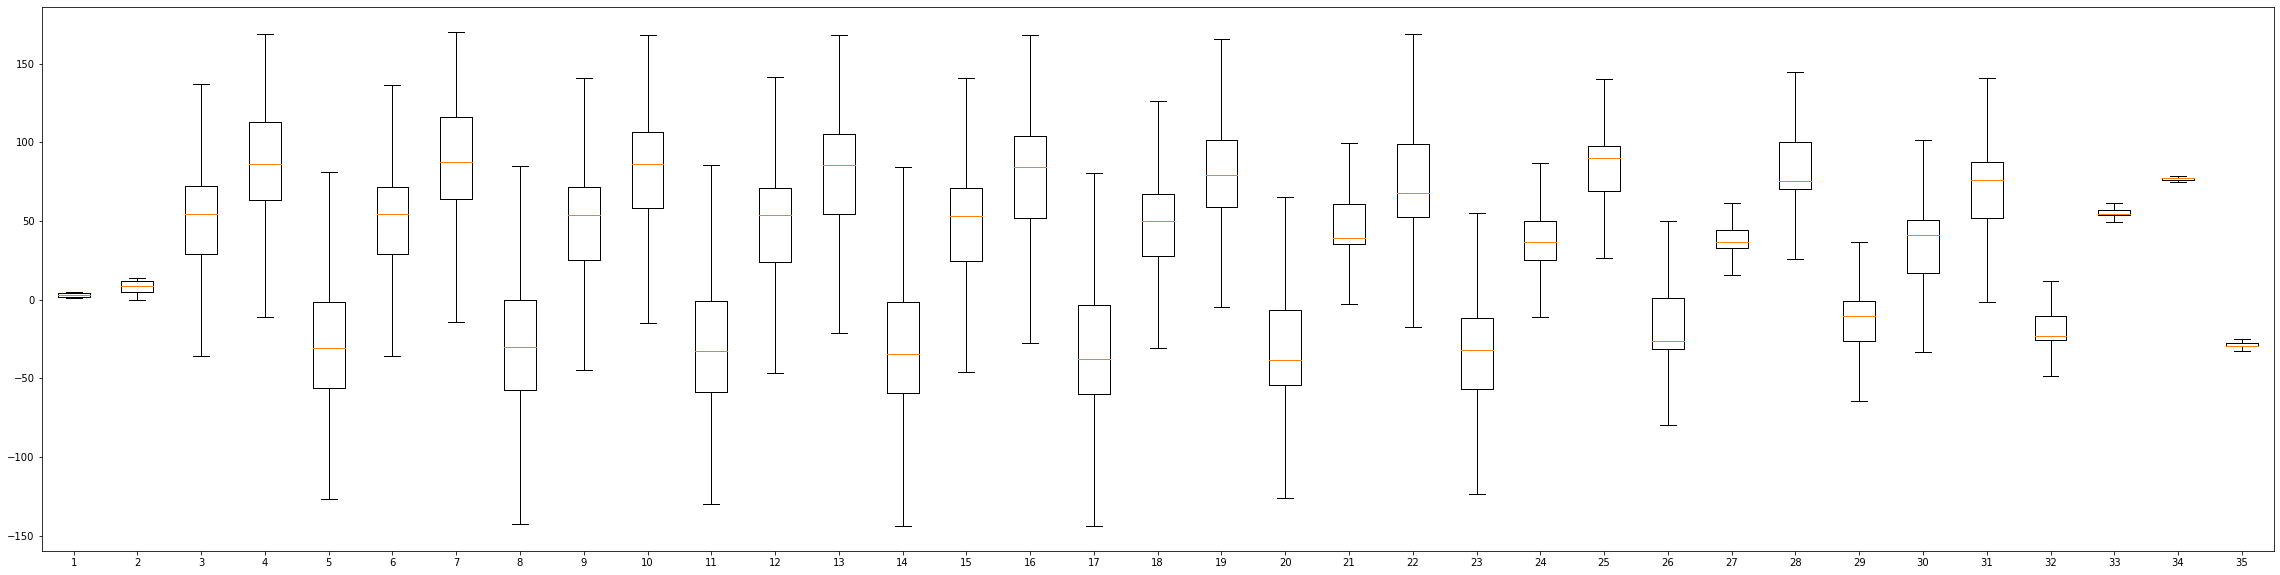

In [20]:
# Plotting the graph after removing outliers
plt.figure(figsize = (40, 10))
plt.boxplot(df)

In [21]:
# Finding the correlation
df.corr()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
Class,1.000000,-0.030714,0.079492,0.081539,0.051954,-0.011153,0.144365,0.090015,-0.052879,0.169339,...,-0.431328,0.110273,-0.102678,-0.396517,-0.067164,-0.057630,-0.393111,0.261075,0.603951,-0.568864
User,-0.030714,1.000000,-0.013231,0.070051,0.192333,-0.042888,0.041542,0.183486,-0.059910,0.000721,...,0.062294,-0.044811,-0.024825,0.024816,-0.032268,-0.061731,-0.058102,0.035874,-0.108520,-0.036324
X0,0.079492,-0.013231,1.000000,-0.288949,-0.240624,0.124712,-0.010227,0.032423,0.106485,-0.013941,...,-0.068560,0.003422,-0.080222,-0.028358,-0.059965,-0.033867,-0.034120,0.036841,0.066446,-0.038211
Y0,0.081539,0.070051,-0.288949,1.000000,0.555375,-0.002696,0.128295,0.227348,0.004414,0.077050,...,-0.072656,0.150770,-0.156867,-0.149771,0.098634,-0.165979,-0.122814,0.056732,-0.058891,-0.080287
Z0,0.051954,0.192333,-0.240624,0.555375,1.000000,0.014514,0.211108,0.464517,0.008465,0.150829,...,-0.019553,0.173141,-0.182350,-0.129421,0.159868,-0.185470,-0.163213,0.080115,-0.102461,-0.113697
X1,-0.011153,-0.042888,0.124712,-0.002696,0.014514,1.000000,-0.296224,-0.264209,0.139583,-0.052785,...,-0.039657,-0.012231,-0.099358,-0.004662,-0.067531,-0.061544,0.001212,-0.007722,0.025880,0.021817
Y1,0.144365,0.041542,-0.010227,0.128295,0.211108,-0.296224,1.000000,0.575463,-0.028562,0.104067,...,-0.069511,0.151247,-0.116476,-0.160806,0.109433,-0.122891,-0.134045,0.105224,-0.009098,-0.119482
Z1,0.090015,0.183486,0.032423,0.227348,0.464517,-0.264209,0.575463,1.000000,-0.009361,0.176062,...,-0.007667,0.200909,-0.143638,-0.125252,0.167363,-0.142913,-0.157053,0.114214,-0.073331,-0.127608
X2,-0.052879,-0.059910,0.106485,0.004414,0.008465,0.139583,-0.028562,-0.009361,1.000000,-0.318468,...,-0.017741,-0.015018,-0.104503,0.009064,-0.061802,-0.093003,0.005331,-0.031895,-0.005042,0.048540
Y2,0.169339,0.000721,-0.013941,0.077050,0.150829,-0.052785,0.104067,0.176062,-0.318468,1.000000,...,-0.041489,0.162980,-0.085041,-0.172913,0.117642,-0.104867,-0.133687,0.137774,-0.002764,-0.133651


# Storing the cleaned dataset to the .csv, .pkl, .npz files 

In [22]:
df.to_csv('Group_8_data_cleaned.csv', index=False)

In [23]:
numpy_array=df.to_numpy()

In [24]:
numpy_array

array([[  1.        ,   0.        ,  54.26387995, ...,  54.05702613,
         76.31191518, -27.77595153],
       [  1.        ,   0.        ,  56.52755845, ...,  54.05702613,
         76.31191518, -27.77595153],
       [  1.        ,   0.        ,  55.84992755, ...,  54.05702613,
         76.31191518, -27.77595153],
       ...,
       [  5.        ,  14.        ,  54.1515399 , ...,  57.02787348,
         78.67710498, -32.5676075 ],
       [  5.        ,  14.        ,  27.91531134, ...,  57.02787348,
         78.67710498, -32.5676075 ],
       [  5.        ,  14.        ,  27.89870542, ...,  57.02787348,
         78.67710498, -32.5676075 ]])

In [25]:
np.savez_compressed('Group_8_data_cleaned.npz', numpy_array)

In [26]:
df.to_pickle('Group_8_data_cleaned.pkl')

# Connecting to MYSQL server using pymysql

In [27]:
# Creating connection
connection = pymysql.connect(host='localhost', user='root', password='Nani@1122')

In [28]:
connection.select_db('group_8')

In [29]:
curs = connection.cursor(pymysql.cursors.DictCursor)

In [30]:
# Selecting the data from table
sql = 'SELECT * FROM group_8_data_cleaned'
curs.execute(sql)

78095

In [31]:
# Fetching the data
dfsql = pd.DataFrame(curs.fetchall())

In [32]:
# Displaying the sql data after fetching from the server
display(dfsql)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
0,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
1,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
2,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
3,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
4,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78090,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-53.126136,61.494952,101.205748,-6.543115,87.733364,61.216363,-48.713932,57.027873,78.677105,-32.567608
78091,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-5.985371,61.523668,60.780642,-62.130563,78.229847,33.078407,-45.249543,57.027873,78.677105,-32.567608
78092,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,-62.718735,15.951786,98.089459,3.835904,78.591554,32.327738,-46.166556,57.027873,78.677105,-32.567608
78093,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,3.394291,61.523668,60.050791,-63.221626,50.793322,91.949619,-30.884241,57.027873,78.677105,-32.567608
